## Technical Comination 

### Abstract

#### This trading strategy aims to capitalize on market trends using a combination of technical indicators, including Bollinger Bands, MACD (Moving Average Convergence Divergence), and Ichimoku Cloud components (Tenkan-sen and Kijun-sen). The strategy utilizes Buy signals derived from the intersection of these indicators to initiate and exit trades.

#### The algorithm identifies entry points by detecting when the closing price exceeds the upper Bollinger Band, the MACD surpasses the Signal Line, and the Tenkan-sen is above the Kijun-sen. Subsequently, the strategy triggers a Buy signal. Exit points are determined when the closing price fails to satisfy the entry conditions, leading to the execution of a Exit signal.

#### Key performance metrics, such as accuracy rate, total number of trades, winning and losing trades, win/loss ratio, profit factor, max loss, max gain, Sharpe ratio, max drawdown, and corresponding periods, are calculated to assess the effectiveness of the strategy.

##### 11th December 2023

[*********************100%***********************]  1 of 1 completed


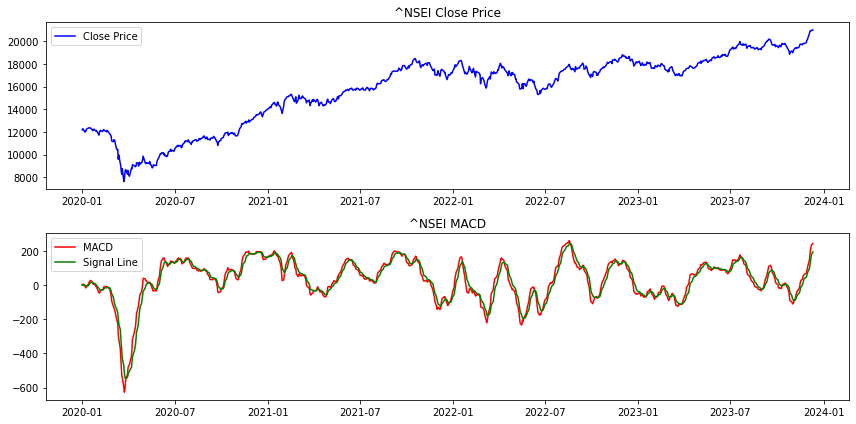

OHLC Data and MACD Values:
                    Open          High           Low         Close  \
Date                                                                 
2023-12-05  20808.900391  20864.050781  20711.150391  20855.099609   
2023-12-06  20950.750000  20961.949219  20852.150391  20937.699219   
2023-12-07  20932.400391  20941.250000  20850.800781  20901.150391   
2023-12-08  20934.099609  21006.099609  20862.699219  20969.400391   
2023-12-11  20965.300781  21026.099609  20923.699219  20997.099609   

                  MACD  Signal Line  
Date                                 
2023-12-05  177.819656   115.883103  
2023-12-06  204.803401   138.113178  
2023-12-07  221.271271   158.902701  
2023-12-08  234.775179   177.870820  
2023-12-11  243.687597   194.325015  


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ticker_symbol = '^NSEI'  
start_date = '2020-01-01'
end_date = '2023-12-31'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

ohlc_data = stock_data[['Open', 'High', 'Low', 'Close']]

# Calculate MACD exponential moving averages
short_ema = ohlc_data['Close'].ewm(span=13, min_periods=0, adjust=False).mean()
long_ema = ohlc_data['Close'].ewm(span=21, min_periods=0, adjust=False).mean()

macd = short_ema - long_ema
signal_line = macd.ewm(span=7, min_periods=0, adjust=False).mean()

# Adding MACD values to the DataFrame
ohlc_data['MACD'] = macd
ohlc_data['Signal Line'] = signal_line

# Plotting the stock's Close price and MACD
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(ohlc_data['Close'], label='Close Price', color='blue')
plt.title(f'{ticker_symbol} Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(macd, label='MACD', color='red')
plt.plot(signal_line, label='Signal Line', color='green')
plt.title(f'{ticker_symbol} MACD')
plt.legend()

plt.tight_layout()
plt.show()

print("OHLC Data and MACD Values:")
print(ohlc_data.tail())


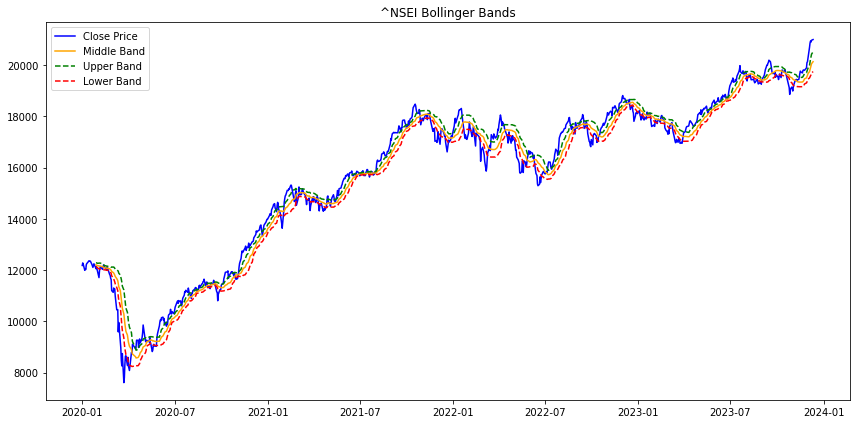

OHLC Data and Bollinger Bands Values:
                    Open          High           Low         Close  \
Date                                                                 
2023-12-05  20808.900391  20864.050781  20711.150391  20855.099609   
2023-12-06  20950.750000  20961.949219  20852.150391  20937.699219   
2023-12-07  20932.400391  20941.250000  20850.800781  20901.150391   
2023-12-08  20934.099609  21006.099609  20862.699219  20969.400391   
2023-12-11  20965.300781  21026.099609  20923.699219  20997.099609   

                  MACD  Signal Line   Middle Band    Upper Band    Lower Band  
Date                                                                           
2023-12-05  177.819656   115.883103  19825.689941  20113.374927  19538.004956  
2023-12-06  204.803401   138.113178  19901.987402  20229.449621  19574.525183  
2023-12-07  221.271271   158.902701  19976.709961  20328.521712  19624.898209  
2023-12-08  234.775179   177.870820  20053.004980  20425.631719  19680.

In [5]:
# parameters for Bollinger Bands
window = 20  # Window for calculating moving average
num_std = 0.7  # Number of standard deviations for the bands

# Calculate the rolling mean and standard deviation
ohlc_data['Middle Band'] = ohlc_data['Close'].rolling(window=window).mean()
ohlc_data['Upper Band'] = ohlc_data['Middle Band'] + (ohlc_data['Close'].rolling(window=window).std() * num_std)
ohlc_data['Lower Band'] = ohlc_data['Middle Band'] - (ohlc_data['Close'].rolling(window=window).std() * num_std)

plt.figure(figsize=(12, 6))

plt.plot(ohlc_data['Close'], label='Close Price', color='blue')
plt.plot(ohlc_data['Middle Band'], label='Middle Band', color='orange')
plt.plot(ohlc_data['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(ohlc_data['Lower Band'], label='Lower Band', color='red', linestyle='--')

plt.title(f'{ticker_symbol} Bollinger Bands')
plt.legend()
plt.tight_layout()
plt.show()

print("OHLC Data and Bollinger Bands Values:")
print(ohlc_data.tail())


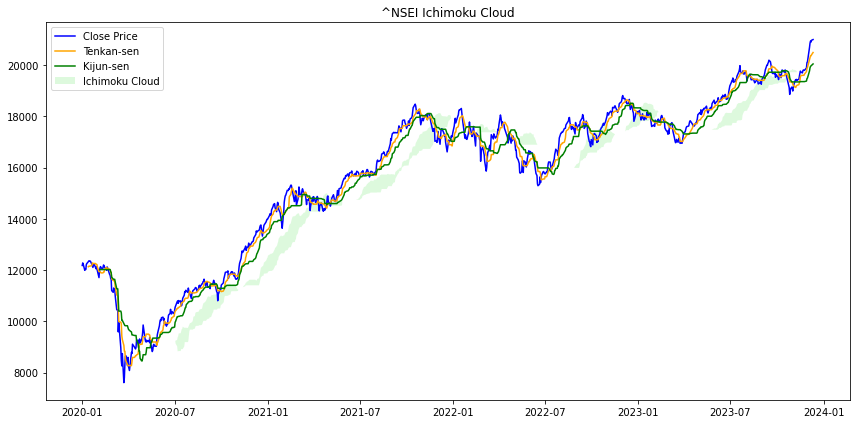

OHLC Data and Ichimoku Cloud Values:
                    Open          High           Low         Close  \
Date                                                                 
2023-12-05  20808.900391  20864.050781  20711.150391  20855.099609   
2023-12-06  20950.750000  20961.949219  20852.150391  20937.699219   
2023-12-07  20932.400391  20941.250000  20850.800781  20901.150391   
2023-12-08  20934.099609  21006.099609  20862.699219  20969.400391   
2023-12-11  20965.300781  21026.099609  20923.699219  20997.099609   

                  MACD  Signal Line   Middle Band    Upper Band    Lower Band  \
Date                                                                            
2023-12-05  177.819656   115.883103  19825.689941  20113.374927  19538.004956   
2023-12-06  204.803401   138.113178  19901.987402  20229.449621  19574.525183   
2023-12-07  221.271271   158.902701  19976.709961  20328.521712  19624.898209   
2023-12-08  234.775179   177.870820  20053.004980  20425.631719  19

In [6]:
# parameters for Ichimoku Cloud
conversion_line_period = 9
base_line_period = 26
leading_span_b_period = 52
displacement = 26

# Calculate Tenkan-sen (Conversion Line)
tenkan_sen_high = ohlc_data['High'].rolling(window=conversion_line_period).max()
tenkan_sen_low = ohlc_data['Low'].rolling(window=conversion_line_period).min()
ohlc_data['Tenkan-sen'] = (tenkan_sen_high + tenkan_sen_low) / 2

# Calculate Kijun-sen (Base Line)
kijun_sen_high = ohlc_data['High'].rolling(window=base_line_period).max()
kijun_sen_low = ohlc_data['Low'].rolling(window=base_line_period).min()
ohlc_data['Kijun-sen'] = (kijun_sen_high + kijun_sen_low) / 2

# Calculate Senkou Span A (Leading Span A)
ohlc_data['Senkou Span A'] = ((ohlc_data['Tenkan-sen'] + ohlc_data['Kijun-sen']) / 2).shift(displacement)

# Calculate Senkou Span B (Leading Span B)
senkou_span_high = ohlc_data['High'].rolling(window=leading_span_b_period).max()
senkou_span_low = ohlc_data['Low'].rolling(window=leading_span_b_period).min()
ohlc_data['Senkou Span B'] = ((senkou_span_high + senkou_span_low) / 2).shift(displacement)

plt.figure(figsize=(12, 6))

plt.plot(ohlc_data['Close'], label='Close Price', color='blue')
plt.plot(ohlc_data['Tenkan-sen'], label='Tenkan-sen', color='orange')
plt.plot(ohlc_data['Kijun-sen'], label='Kijun-sen', color='green')
plt.fill_between(ohlc_data.index, ohlc_data['Senkou Span A'], ohlc_data['Senkou Span B'], where=ohlc_data['Senkou Span A'] >= ohlc_data['Senkou Span B'], facecolor='lightgreen', interpolate=True, alpha=0.3, label='Ichimoku Cloud')

plt.title(f'{ticker_symbol} Ichimoku Cloud')
plt.legend()
plt.tight_layout()
plt.show()

print("OHLC Data and Ichimoku Cloud Values:")
print(ohlc_data.tail())


In [7]:
in_trade = False
buy_price = 0
sell_price = 0
trade_count = 0
total_profit = 0

buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []
profits = []

# Define trade signals
for index, row in ohlc_data.iterrows():
    if not in_trade:
        # Entry conditions
        if row['Close'] > row['Upper Band'] and row['MACD'] > row['Signal Line'] and row['Tenkan-sen'] > row['Kijun-sen']:
            in_trade = True
            buy_price = row['Close']
            buy_dates.append(index.date())
            buy_prices.append(buy_price)
            print(f"Buy at {index.date()} - Price: {buy_price}")
    else:
        # Exit conditions
        if not (row['Close'] > row['Upper Band'] and row['Signal Line'] > 0 and row['Tenkan-sen'] > row['Kijun-sen']):
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit
            trade_count += 1
            sell_dates.append(index.date())
            sell_prices.append(sell_price)
            profits.append(profit)
            print(f"Sell at {index.date()} - Price: {sell_price} - Profit: {profit:.2f}")
            in_trade = False

# Ensure all lists have the same length
min_length = min(len(buy_dates), len(buy_prices), len(sell_dates), len(sell_prices), len(profits))

# Create a DataFrame to store the trade information
df_trades = pd.DataFrame({
    'Buy Date': buy_dates[:min_length],
    'Buy Price': buy_prices[:min_length],
    'Sell Date': sell_dates[:min_length],
    'Sell Price': sell_prices[:min_length],
    'Profit': profits[:min_length]
})

# Save the DataFrame to a CSV file
df_trades.to_csv('trades_output.csv', index=False)

# Calculate overall results
if trade_count > 0:
    avg_profit_per_trade = total_profit / trade_count
    print(f"\nTotal Trades: {trade_count}")
    print(f"Total Profit: {total_profit:.2f}")
    print(f"Average Profit per Trade: {avg_profit_per_trade:.2f}")
else:
    print("No trades executed based on the strategy.")


Buy at 2020-04-22 - Price: 9187.2998046875
Sell at 2020-04-23 - Price: 9313.900390625 - Profit: 126.60
Buy at 2020-04-24 - Price: 9154.400390625
Sell at 2020-04-27 - Price: 9282.2998046875 - Profit: 127.90
Buy at 2020-04-28 - Price: 9380.900390625
Sell at 2020-04-29 - Price: 9553.349609375 - Profit: 172.45
Buy at 2020-04-30 - Price: 9859.900390625
Sell at 2020-05-04 - Price: 9293.5 - Profit: -566.40
Buy at 2020-06-01 - Price: 9826.150390625
Sell at 2020-06-15 - Price: 9813.7001953125 - Profit: -12.45
Buy at 2020-06-22 - Price: 10311.2001953125
Sell at 2020-07-14 - Price: 10607.349609375 - Profit: 296.15
Buy at 2020-07-21 - Price: 11162.25
Sell at 2020-07-31 - Price: 11073.4501953125 - Profit: -88.80
Buy at 2020-08-26 - Price: 11549.599609375
Sell at 2020-08-31 - Price: 11387.5 - Profit: -162.10
Buy at 2020-10-08 - Price: 11834.599609375
Sell at 2020-10-15 - Price: 11680.349609375 - Profit: -154.25
Buy at 2020-10-16 - Price: 11762.4501953125
Sell at 2020-10-26 - Price: 11767.75 - Profit

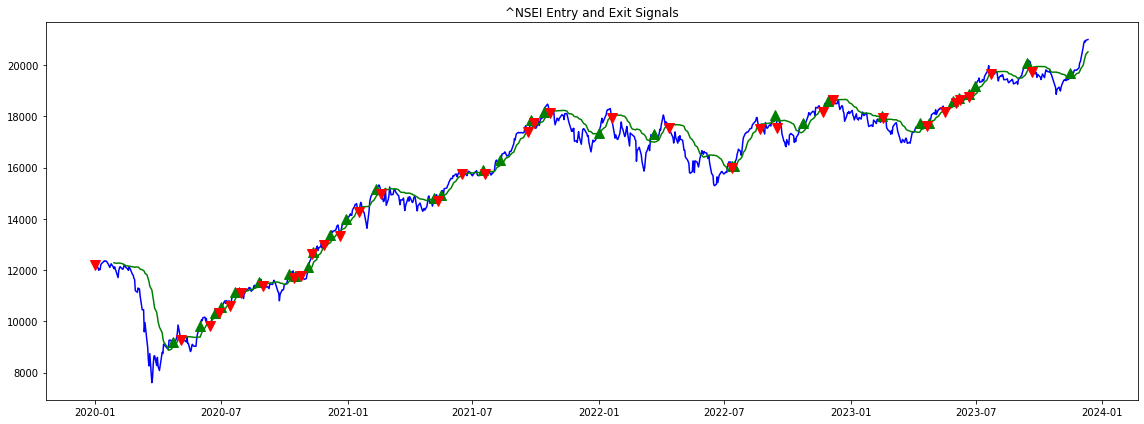

In [8]:
buy_signals = []
sell_signals = []

# Define trade signals
for index, row in ohlc_data.iterrows():
    if not in_trade:
        # Entry conditions
        if (
            row['Close'] > row['Upper Band'] and
            row['MACD'] > row['Signal Line'] and
            row['Tenkan-sen'] > row['Kijun-sen']
        ):
            in_trade = True
            buy_price = row['Close']
            buy_signals.append((index, buy_price))
    else:
        # Exit conditions
        if not (
            row['Close'] > row['Upper Band'] and
            row['MACD'] > row['Signal Line'] and
            row['Tenkan-sen'] > row['Kijun-sen']
        ):
            sell_price = row['Close']
            sell_signals.append((index, sell_price))
            in_trade = False

plt.figure(figsize=(16, 6))
plt.plot(ohlc_data.index, ohlc_data['Close'], label='Close Price', color='blue')
plt.plot(ohlc_data.index, ohlc_data['Upper Band'], label='Upper Bollinger Band', color='green')

# Plotting entry signals
for signal in buy_signals:
    plt.plot(signal[0], signal[1], '^', markersize=10, color='green', label='Buy Signal')

# Plotting exit signals
for signal in sell_signals:
    plt.plot(signal[0], signal[1], 'v', markersize=10, color='red', label='Sell Signal')

plt.title(f'{ticker_symbol} Entry and Exit Signals')

plt.tight_layout()
plt.show()


In [9]:
# Print data for buy signals
for signal in buy_signals:
    index, buy_price = signal
    signal_data = ohlc_data.loc[index]
    print(f"Buy Signal Date: {index.date()}")
    print(f"Close Price: {signal_data['Close']}")
    print(f"Upper Bollinger Band: {signal_data['Upper Band']}")
    print(f"MACD: {signal_data['MACD']}")
    print(f"Signal Line: {signal_data['Signal Line']}")
    print(f"Tenkan-sen: {signal_data['Tenkan-sen']}")
    print(f"Kijun-sen: {signal_data['Kijun-sen']}")
    print("--------------------")

# Print data for sell signals
for signal in sell_signals:
    index, sell_price = signal
    signal_data = ohlc_data.loc[index]
    print(f"Sell Signal Date: {index.date()}")
    print(f"Close Price: {signal_data['Close']}")
    print(f"Upper Bollinger Band: {signal_data['Upper Band']}")
    print(f"MACD: {signal_data['MACD']}")
    print(f"Signal Line: {signal_data['Signal Line']}")
    print(f"Tenkan-sen: {signal_data['Tenkan-sen']}")
    print(f"Kijun-sen: {signal_data['Kijun-sen']}")
    print("--------------------")


Buy Signal Date: 2020-04-22
Close Price: 9187.2998046875
Upper Bollinger Band: 8993.526740088728
MACD: -94.20135297097477
Signal Line: -180.56808812429958
Tenkan-sen: 9022.375
Kijun-sen: 8835.250244140625
--------------------
Buy Signal Date: 2020-06-01
Close Price: 9826.150390625
Upper Bollinger Band: 9384.979954129178
MACD: 50.41049502557871
Signal Line: 7.054196077415096
Tenkan-sen: 9393.44970703125
Kijun-sen: 9369.1748046875
--------------------
Buy Signal Date: 2020-06-22
Close Price: 10311.2001953125
Upper Bollinger Band: 10120.587391855634
MACD: 127.6720116330307
Signal Line: 122.66232741615069
Tenkan-sen: 9969.0
Kijun-sen: 9600.2001953125
--------------------
Buy Signal Date: 2020-07-02
Close Price: 10551.7001953125
Upper Bollinger Band: 10330.754036668091
MACD: 132.58098895056173
Signal Line: 131.37504190062646
Tenkan-sen: 10396.35009765625
Kijun-sen: 9967.35009765625
--------------------
Buy Signal Date: 2020-07-21
Close Price: 11162.25
Upper Bollinger Band: 10819.63921399229

In [10]:
df_trades = pd.read_csv('trades_output.csv')

# Calculate metrics
if not df_trades.empty:
    # Accuracy rate
    accuracy_rate = (df_trades['Profit'] > 0).sum() / len(df_trades)

    # Performance ratios
    total_trades = len(df_trades)
    winning_trades = (df_trades['Profit'] > 0).sum()
    losing_trades = total_trades - winning_trades

    win_loss_ratio = winning_trades / max(1, losing_trades)
    profit_factor = abs(df_trades['Profit'][df_trades['Profit'] > 0].sum() / df_trades['Profit'][df_trades['Profit'] < 0].sum())
    
    print(f"\nAccuracy Rate: {accuracy_rate * 100:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win/Loss Ratio: {win_loss_ratio:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
else:
    print("No trades executed based on the strategy.")


Accuracy Rate: 52.38%
Total Trades: 42
Winning Trades: 22
Losing Trades: 20
Win/Loss Ratio: 1.10
Profit Factor: 2.36


In [11]:
import numpy as np

if not df_trades.empty:
    max_loss = df_trades['Profit'].min()
    max_gain = df_trades['Profit'].max()

    df_trades['Cumulative Profit'] = df_trades['Profit'].cumsum()
    df_trades['Previous Peak'] = df_trades['Cumulative Profit'].cummax()
    df_trades['Drawdown'] = df_trades['Cumulative Profit'] - df_trades['Previous Peak']
    max_drawdown = df_trades['Drawdown'].min()

    print(f"\nMax Loss: {max_loss:.2f}")
    print(f"Max Gain: {max_gain:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}")

else:
    print("No trades executed based on the strategy.")


Max Loss: -566.40
Max Gain: 1441.50
Max Drawdown: -687.85
